In [9]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

from tdfs import tdfs_routine, log_upper_bound

# Single example TDFS
This next run is designed just to show the results we obtain with TDFS

In [10]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 1000
arm_means = [0.2, 0.3, 0.5, 0.8, 0.9]

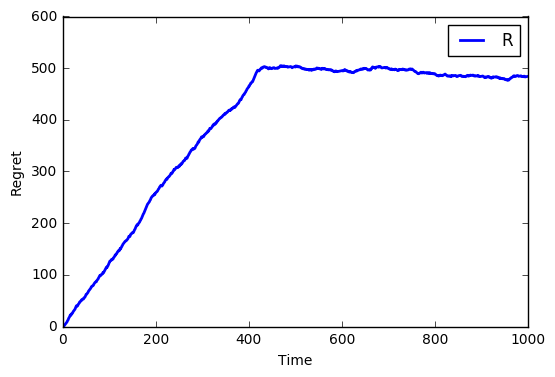

In [3]:
dummy_r = tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb', plot=True)

# Expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy. It also shows the upper calculated thanks to the second theorem 2.

In [11]:
# MONTE-CARLO PARAMETERS
mc_horizon = 50
rewards = np.zeros((mc_horizon, t_horizon))

In [12]:
for t in range(mc_horizon):
    rewards[t, :] = tdfs_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

In [21]:
c = log_upper_bound(n_users, arm_means)
upper_bound = [c * math.log(t) for t in range(1, t_horizon)]
upper_bound = [0] + upper_bound

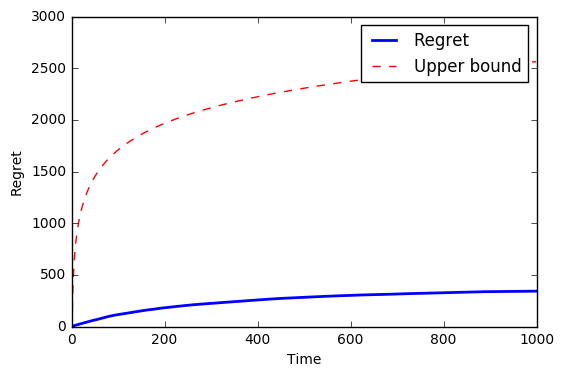

In [22]:
expected_rewards = np.mean(rewards, axis=0)
best_arms = np.sort(np.array(arm_means))[-n_users:]
expected_regret = np.cumsum(best_arms.sum() - expected_rewards)
plt.plot(expected_regret, linewidth=2, label="Regret")
plt.plot(upper_bound, "r--", label="Upper bound")
plt.ylabel("Regret")
plt.xlabel("Time")
plt.legend()
plt.show()